In [76]:
  # Ejercicios de KNN ===> https://realpython.com/knn-python/#basics-of-machine-learning
  # Con DataSet de DataSetr repository ===> https://archive.ics.uci.edu/ml/datasets/Zoo

In [10]:
import pandas as pd
url = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data"
)
zoo = pd.read_csv(url, header=None)

In [16]:
zoo.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [19]:
zoo.columns = [
       'animal name',
       'hair',
       'feathers',
       'eggs',
       'milk',
       'airborne',
       'aquatic',
       'predator',
       'toothed',
       'backbone',
       'breathes',
       'venomous',
       'fins',
       'legs',
       'tail',
       'domestic',
       'catsize',
       'type',
]

In [22]:
zoo= zoo.drop("animal name", axis=1)

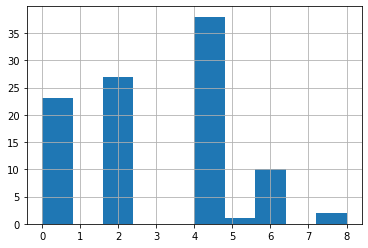

In [44]:
import matplotlib.pyplot as plt
zoo["legs"].hist(bins=10)
plt.show()

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=189895
)

In [110]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=9)

In [111]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [112]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

1.4121387334356124

In [113]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

1.3104293806495664

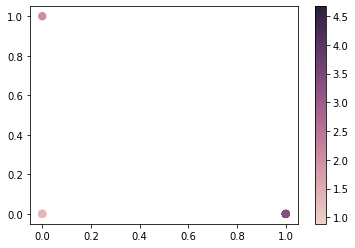

In [116]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

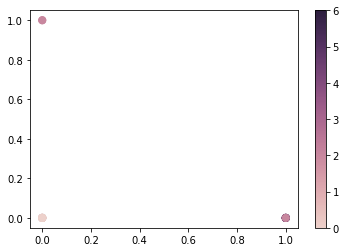

In [117]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap
)
f.colorbar(points)
plt.show()

In [118]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [123]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)


GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [124]:
gridsearch.best_params_

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

1.4563368354718622

In [125]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights
)

In [126]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)